# CSCE 554 In Class
# Marvin Newlin


In [9]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas
import random

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

In [2]:
subcompact = np.array([3, 5, 3, 7, 6, 5, 3, 2, 1, 6])
compact = np.array([1, 3, 4, 7, 5, 6, 3, 2, 1, 7])
midsize = np.array([4, 1, 3, 5, 7, 1, 2, 4, 2, 7])
fullsize = np.array([3, 5, 7, 5, 10, 3, 4, 7, 2, 7])

subcompact_mean = subcompact.mean()
compact_mean = compact.mean()
midsize_mean = midsize.mean()
fullsize_mean = fullsize.mean()

n = 10
a = 4
N = a*n

mean_total = (subcompact_mean + compact_mean + 
              midsize_mean + fullsize_mean)/4

all_vals = np.array([])
all_vals = np.append(all_vals, subcompact)
all_vals = np.append(all_vals, compact)
all_vals = np.append(all_vals, midsize)
all_vals = np.append(all_vals, fullsize)


all_vals_diff = all_vals - all_vals.mean()

SST = np.dot(all_vals_diff.T,all_vals_diff)
print("SST:",SST)


SSTreat = n * ((subcompact_mean - mean_total)**2 + (midsize_mean - mean_total)**2 + 
                    (compact_mean - mean_total)**2 + (fullsize_mean - mean_total)**2 )


print("SSTreat",SSTreat)

SSE = SST - SSTreat

print("SSE:",SSE)

MSE = SSE/(N-a)

MSTreat = SSTreat/(a-1)

print("MSTreat",MSTreat)
print("MSE",MSE)

F0 = MSTreat/MSE

print("F0",F0)

p_val = 1 - stats.f.cdf(F0,a-1,N-a)

print("p-val",p_val)

SST: 196.975
SSTreat 16.674999999999997
SSE: 180.3
MSTreat 5.558333333333333
MSE 5.008333333333334
F0 1.10981697171381
p-val 0.3578235508277885


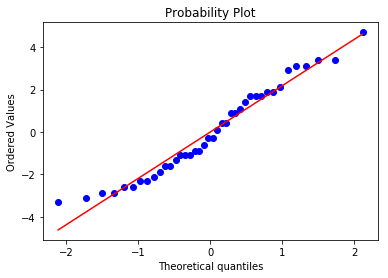

In [10]:
r1 = subcompact - subcompact_mean
r2 = compact - compact_mean
r3 = midsize - midsize_mean
r4 = fullsize - fullsize_mean
resid = np.hstack((r1, r2, r3, r4))
stats.probplot(resid, plot=plt)
plt.show()

In [11]:
vals = np.array([84.99, 84.04, 84.38,
                 85.15, 85.13, 84.88,
                 84.72, 84.48, 85.16,
                 84.20, 84.10, 84.55])
c1 = np.array([84.99, 84.04, 84.38])
c2 = np.array([85.15, 85.13, 84.88])
c3 = np.array([84.72, 84.48, 85.16])
c4 = np.array([84.20, 84.10, 84.55])


a = 4
n = 3
N = a*n

total_mean = vals.mean()

total_diff = vals - total_mean

SST = np.dot(total_diff.T,total_diff)

SSTreat = n * ((total_mean-c1.mean())**2 + (total_mean-c2.mean())**2
                + (total_mean-c3.mean())**2 + (total_mean-c4.mean())**2)
SSE = SST- SSTreat
MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)

F0 = MSTreat/MSE

p_val = 1 - stats.f.cdf(F0,MSTreat,MSE)

print("SST",SST)
print("SSTreat",SSTreat)
print("SSE",SSE)
print("MSTreat",MSTreat)
print("MSE",MSE)
print("F0",F0)
print("P-val",p_val)


SST 1.9027666666666565
SSTreat 1.0445666666666225
SSE 0.858200000000034
MSTreat 0.34818888888887417
MSE 0.10727500000000426
F0 3.2457598591364283
P-val 0.6819915338474609


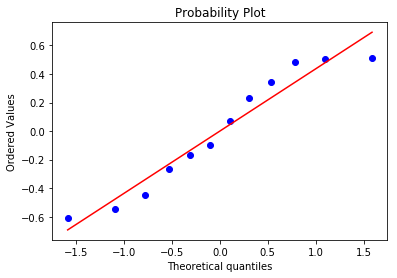

In [5]:
stats.probplot(total_diff, plot=plt)
plt.show()

The practical interpretation of this interval is that the 95% of the mean thicknesses of the wafers baked at the higher temperatures will fall be somewhere in the above interval less than the wafers baked at the lower temperature. We know that it is less because the t-score was negative.

In [6]:
mu = 10
rand_1 = np.random.randint(4,9)
model_1 = np.random.randn(rand_1,1) + mu
n_1 = model_1.size
model_1_mean = model_1.mean()

rand_2 = np.random.randint(4,9)
model_2 = np.random.randn(rand_2,1) + mu
n_2 = model_2.size
model_2_mean = model_2.mean()

rand_3 = np.random.randint(4,9)
model_3 = np.random.randn(rand_3,1) + mu
n_3 = model_3.size
model_3_mean = model_3.mean()

rand_4 = np.random.randint(4,9)
model_4 = np.random.randn(rand_4,1) + mu
n_4 = model_4.size
model_4_mean = model_4.mean()

rand_5 = np.random.randint(4,9)
model_5 = np.random.randn(rand_5,1) + mu
n_5 = model_5.size
model_5_mean = model_5.mean()

model = np.array([])
model = np.append(model,model_1)
model = np.append(model,model_2)
model = np.append(model,model_3)
model = np.append(model,model_4)
model = np.append(model,model_5)

model_mean = model.mean()

model_diff = model - model_mean

model_mean_diff = np.array([model_1_mean, model_2_mean, model_3_mean, model_4_mean, model_5_mean])
model_mean_diff = model_mean_diff - model_mean

SST = np.dot(model_diff.T,model_diff)
SSTreat = model_mean_diff[0]*n_1 + model_mean_diff[1]+n_2 + model_mean_diff[2]*n_3 + model_mean_diff[3]*n_4 + model_mean_diff[4]*n_5
SSE = SST - SSTreat
a = 5
N = n_1 + n_2 + n_3 + n_4 + n_5
MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)
F_0 = MSTreat/MSE
p_val = 1-stats.f.cdf(F_0,MSTreat,MSE)

print(p_val)

0.4884800899932604


In [17]:
### Working on getting table vals

